In [2]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<h1 align="center"><u><strong>Project 1</strong></u></h1>

# Introduction

#### The purpose of this notebook is to 1) layout the data in a clear concise way 2) provide for basic summary calculations 3) outline the relationship between the number of total flights at each location and the corresponding flight delays 4) display a bar graph that clearly outlines flights data as well as a regression graph that presents the nature of the relationship of total flights to flight delays.

## This Section imports Packages, reads file, sets params, and reconfigures original dataframe.

In [3]:
import pandas as pd #import pandas
import numpy as np #import numpy
import matplotlib.pyplot as plt #import matplotlib
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams.update({'font.size': 20})


In [4]:
#import data for project from csv format.
df = pd.read_csv("/Users/thomaskenneally/Desktop/CUNY SPS texts:files/fall 2018/is362/Project1_data.csv")

In [5]:
#replace NaN values with prior value in column and reset df equal to modified dataframe.
df = df.fillna(method='ffill')
df = df.rename(columns={'Location': 'Airline'})
df.set_index(['Airline', 'Status'], drop=False)

df

,Airline,Status,Los Angeles,Phoenix,San Diego,San Fransico,Seattle
0,Alaska,on time,497,221,212,503,1841
1,Alaska,delayed,62,12,20,102,305
2,AM WEST,on time,694,4840,383,320,201
3,AM WEST,delayed,117,415,65,129,61


## The following code calculates the mean and sums using iloc 

#### AM WEST has the greater average delays than Alaska. AM WEST has more total flights than Alaska at roughly 1.9 times as many flights

*Calculates the average number of flights delayed for Alaska from all locations as an integer*

In [6]:
avg = int(df.iloc[1][2:].mean())
print ("Averge: " + str(avg))

Averge: 100


*Calculates the average number of flights delayed for AM WEST from all locations as an integer*

In [7]:
int(df.iloc[3][2:].mean())

157

*Total flights Alaska*

In [8]:
ttl_Alaska = df.iloc[0][2:].sum() + df.iloc[1][2:].sum()
ttl_Alaska 

3775

*Total Flights AMWEST*

In [9]:
ttl_AMWEST = df.iloc[2][2:].sum() + df.iloc[3][2:].sum()
ttl_AMWEST 

7225

In [10]:
ttl_flights_ratio = ttl_AMWEST / ttl_Alaska
ttl_flights_ratio

1.913907284768212

## Pivot Table Based on Original Data Frame

In [11]:
pt = pd.pivot_table(df, index=['Airline','Status'], aggfunc=np.sum)
pt

Los Angeles  Phoenix  San Diego  San Fransico  Seattle
Airline Status                                                         
AM WEST delayed          117      415         65           129       61
        on time          694     4840        383           320      201
Alaska  delayed           62       12         20           102      305
        on time          497      221        212           503     1841

## Bar Graph Based on the Above Pivot Table

Text(0.5,0,'Airline')

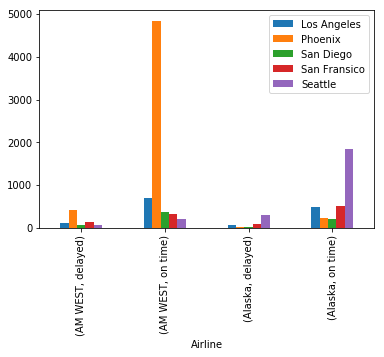

In [12]:
pt.plot(kind='bar').set_xlabel("Airline")

### Total flights from each Location will be used as input for a regression graph with pivot table for ttl_delayed. The purpose of this pivot table  is to compare the total flights for each location. For AM WEST Phoenix has the greatest number of flights whereas Seattle has the greatest amount of flights for Alaska.

In [13]:
ttl_flights = pd.pivot_table(df, index='Airline', aggfunc=np.sum)
ttl_flights

,Los Angeles,Phoenix,San Diego,San Fransico,Seattle
Airline,,,,,
AM WEST,811,5255,448,449,262
Alaska,559,233,232,605,2146


### This pivot table provides a drill down for total delayed flights at each geographic location. 

In [14]:
ttl_delayed = pt.query('Status == ["delayed"]') 
ttl_delayed = ttl_delayed.reset_index(['Status'], drop=True)
ttl_delayed

,Los Angeles,Phoenix,San Diego,San Fransico,Seattle
Airline,,,,,
AM WEST,117,415,65,129,61
Alaska,62,12,20,102,305


### This pivot table provides a percent of total flights that are delayed by location and Airline. Also, this pivot table will be used for a regression graph showing the line of best fit between total number of flights and the percentage of flights delayed. This will be used in combination with the ttl_flights pivot table. 

In [15]:
perc_delay = ttl_delayed / ttl_flights
perc_delay

,Los Angeles,Phoenix,San Diego,San Fransico,Seattle
Airline,,,,,
AM WEST,0.144266,0.078972,0.145089,0.287305,0.232824
Alaska,0.110912,0.051502,0.086207,0.168595,0.142125


## Regression Analyses 

[Text(0,0.5,'%age of delayed flights'),
 Text(0.5,0,'Total Flights'),
 Text(0.5,1,'Flights Data')]

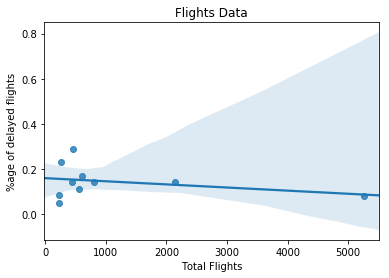

In [16]:
x1 = ttl_flights.loc['AM WEST'].append(ttl_flights.loc['Alaska'])
y1 = perc_delay.loc['AM WEST'].append(perc_delay.loc['Alaska'])
ax = sns.regplot(x= x1, y= y1, )
ax.set(xlabel='Total Flights', ylabel='%age of delayed flights', title= 'Flights Data')

# Conclusion

**Based on the regression graph, the general trend of the line of best fit trends downard. Therefore, as the number of total flights increases at a given location, the percentage of flight delays per location tends to decrease.**